In [ ]:
# find minimum threshold between n=0 and n=1 population
# fit from this point onwards to2 gaussians, with Poisson amplitude constraints
# save fitted data into g1_component.dat and g2_component.dat

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import MultipleLocator
matplotlib.rcParams.update({'font.size': 18})
import thres

In [3]:
# load data set containing several types of areas
dt = 2 #ns
scale = 1e3 #change from volts to mV
bins = 200
data_cont_dtleft0 = np.loadtxt('data_cont_dtleft0_dtright1300_hth_discrminated7.73E-03.dat')

In [4]:
area_disc = data_cont_dtleft0[:,0]*dt*scale
area_above_th = data_cont_dtleft0[:,1]*dt*scale
area = data_cont_dtleft0[:,2]*dt*scale

np.savetxt('area_disc.dat',area_disc)
np.savetxt('area_above_th.dat',area_above_th)
np.savetxt('area.dat',area)

In [5]:
def centered_hist(data,bins):
    """
    returns a bin-centred histogram
    """
    hist = np.histogram(data,bins)
    frequencies = hist[0]
    x_val = hist[1]
    step = np.diff(x_val)[0]
    x_val = x_val[:-1] + step / 2.
    return frequencies, x_val

# 1. Compare between different area calculation methods

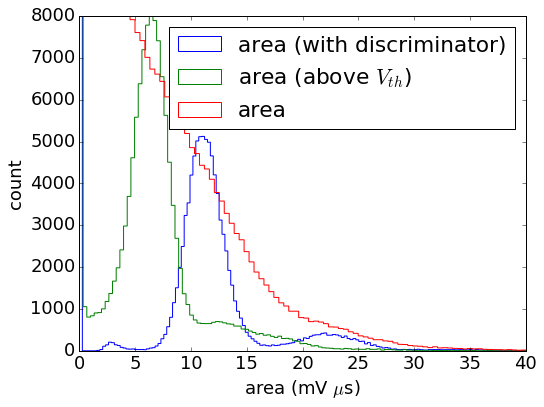

In [6]:
plt.figure(figsize=(8,6))
plt.hist(area_disc,bins, histtype='step',label='area (with discriminator)');
plt.hist(area_above_th, bins,histtype='step',label='area (above $V_{th}$)');
plt.hist(area,bins, histtype='step',label='area');

plt.legend()
plt.ylim(0,8000)
plt.xlim(0,20*dt*scale)

ticks = (plt.gca().get_xticks()*10**-3).astype('int')
plt.gca().set_xticklabels(ticks)

plt.xlabel('area (mV $\mu$s)')
plt.ylabel('count')

plt.savefig('area_histos_comparison.eps')
plt.show()

## 1.1 Create & Save histogram data for presentation plot

In [7]:
np.savetxt('pnr_area.dat',zip(*centered_hist(area,bins)))
np.savetxt('pnr_area_above_th.dat',zip(*centered_hist(area_above_th,bins)))
np.savetxt('pnr_area_disc.dat',zip(*centered_hist(area_disc,bins)))

# 2. Fit discriminated area histogram

<IPython.core.display.Javascript object>


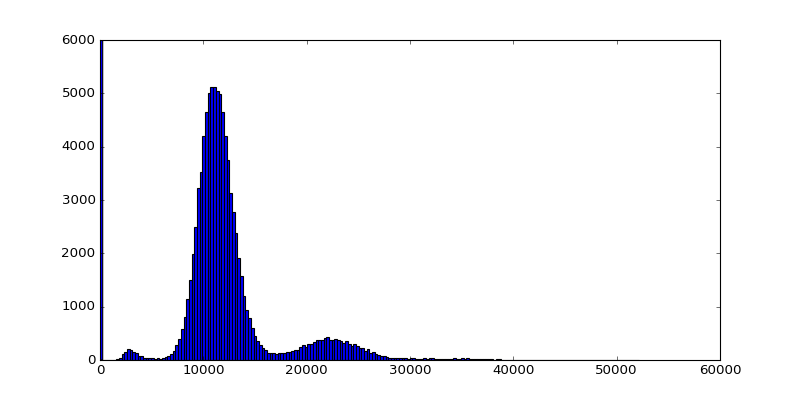

In [19]:
# take a peek at the area distribution to be fitted
%matplotlib notebook
plt.figure(figsize=(10,5))
plt.hist(area_disc,bins);
plt.ylim(0,6000)
plt.show()

In [9]:
pnr_area = np.histogram(area_disc, bins) 
#thres.gauss_fit_ function used below works with non-centered pnrs.

est peak pos = [  2867.59559446  11209.69186925  22158.69322992]
 est peak hts = [ 206 5123  426]
th01 = 5604.84593463


thres.py:65: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 3 but corresponding boolean dimension is 2
  peak_height = peak_height[peaks_pos>th01]


<IPython.core.display.Javascript object>


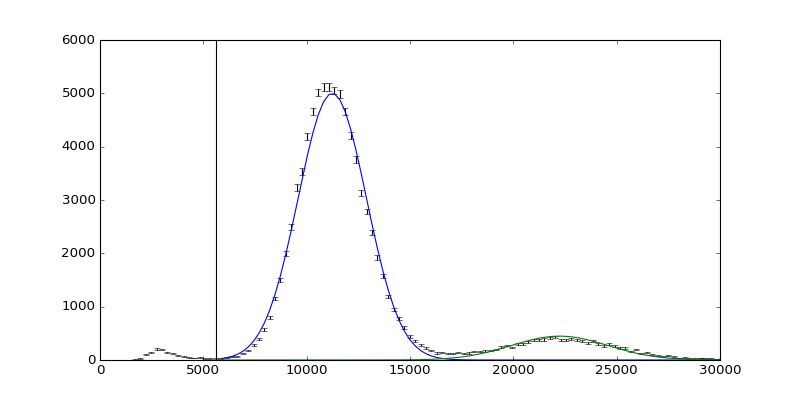

[[Model]]
    (Model(gaussian, prefix='g1_') + Model(gaussian, prefix='g2_'))
[[Fit Statistics]]
    # function evals   = 419
    # data points      = 178
    # variables        = 6
    chi-square         = 2136.999
    reduced chi-square = 12.424
    Akaike info crit   = 454.397
    Bayesian info crit = 473.487
[[Variables]]
    n_bar:          0.25298513 (init= 0.2)
    A:              1.0557e+08 (init= 3.0738e+07)
    Delta_E:        11008.0925 (init= 10949)
    sigma_p:        1654.06436 (init= 1350.474)
    g1_center:      11240.2197 (init= 11209.69)
    g2_center:      22243.4035 (init= 22158.69)
    g1_amplitude:   2.0738e+07  == 'A * exp(-n_bar) * n_bar**1 / factorial(1)'
    g2_amplitude:   2.6232e+06  == 'A * exp(-n_bar) * n_bar**2 / factorial(2)'
    g1_sigma:       1654.06436  == 'sigma_p * sqrt(1)'
    g2_sigma:       2339.20026  == 'sigma_p * sqrt(2)'
[[Correlations]] (unreported correlations are <  0.100)



(0, 30000.0)

In [10]:
# fits and generates components
reload(thres)
result = thres.gauss_fit_poiss_ph_region(pnr_area,
                                          min_peak_sep=3*dt*scale, 
                                          threshold=1e-2, 
                                          weighted=True,
                                          plot=True)
plt.ylim(0,6000)
plt.xlim(0,15*dt*scale)

In [11]:
result.best_values

{'g1_amplitude': 20737924.81431767,
 'g1_center': 11240.219750753173,
 'g1_sigma': 1654.0643670878364,
 'g2_amplitude': 2623193.347266756,
 'g2_center': 22243.403590941805,
 'g2_sigma': 2339.2002609736883}

In [12]:
result.best_values['g2_center']/result.best_values['g1_center']

1.9789118081478205

In [13]:
reload(thres)
result = thres.thresholds_N(pnr_area,
                                          min_peak_sep=3*dt*scale, 
                                          threshold=1e-2, 
                                          weighted=True)

est peak pos = [  2867.59559446  11209.69186925  22158.69322992]
 est peak hts = [ 206 5123  426]
th01 = 5604.84593463
at threshold 15921.253917:
prob signal lost = 0.00343897001103
prob noise enters = 0.00232725944472


## 2.1 Create and save fitted histograms

In [22]:
frequencies, x_val = centered_hist(area_disc,bins)

In [16]:
[g1, g2] = [result.eval_components(x=x_val)['g{}_'.format(k+1)] for k,_ in enumerate(result.components)]

In [25]:
np.savetxt('g1_area_component.dat',np.array(zip(g1,x_val)))
np.savetxt('g2_area_component.dat',np.array(zip(g2,x_val)))